# Chapter 2: Markov Decision Processes
# Introduction

Markov Decision Processes (MDP) formally describe an environment in reinforcement learning.

In these cases, the environment is fully observable. 
So we can say that the current state completely characterises the process.

Almost all problems in RL can be formulated as an MDP.

- Optimal Control primarily deals with continous MDPs
- Paratially observable problems can be converted into MDPs.
- "Bandits" are MDPs with only one state

## Markov Property
The future is independant of the past given the present. 

## State Transition Matrix

The state transition probability for a markov state s and it's successor state s' is:

$\mathcal{P}_{ss'}=\mathbb{P}[S_{t+1}=s'|S_t=s]$

The state transition matrix $\mathcal{P}$ then defines all the transition probabilities from all states s to all successor states s':

$\mathcal{P}=\text{from} \overset{\text{to}}{\begin{bmatrix} \mathcal{P}_{11} & ... & \mathcal{P}_{1n}\\
... & & ... \\ \mathcal{P}_{n1} & ... & \mathcal{P}_{nn} \end{bmatrix}}$

The sum of each row sums up to 1.  

## Markov Processes (Chains)
A Markov process is a memoryless random process, i.e., a sequence of random states $S_1,S_2,...$ with the Markov property.

### Definition
A Markov Process (or Markov Chain) is a tuple $\langle\mathcal{S},\mathcal{P}\rangle$
- $\mathcal{S}$ is a (finite) set of states.
- $\mathcal{P}$ is a state transition probability matrix,
- $\mathcal{P}_{ss'}=\mathbb{P}[S_{t+1}=s'|S_t=s]$

# Markov Reward Processes
A Markov reward process is a Markov chain with values.

### Definition
Markov Reward Process is a tuple $\langle\mathcal{S},\mathcal{P},\mathcal{R},\gamma\rangle$
- $\mathcal{S}$ is a finite set of states
- $\mathcal{P}$ is a state transition probability matrix,

$\mathcal{P}_{ss'}=\mathbb{P}[S_{t+1}=s'|S_t=s]$

- $\mathcal{R}$ is a reward function, $\mathcal{R}_s=\mathbb{E}[R_{t+1}|S_t=s]$
- $\gamma$ is a discount factor, between 0 and 1

## Return
### Definition
The return $G_t$ is the totla discounted reward from time-step t.

$G_t = R_{t+1}+\gamma R_{t+2}+...=\sum^{\infty}_{k=0}\gamma^kR_{t+k+1}$

### Why use discount rates 
We use a discount rate because we don't have a perfect model of the future, there's a level of uncertainty. It also helps to avoid infinite returns, because if there's no devaluing, then rewards that are millions of timesteps away are just as important as the next reward. 

Discount rates are also helpful for cyclical markov processes, because you could just keep going around a reward transition and get infinite reward.

There are also specific benefits to different areas. For example in finance, money now is typically worth more in the future, due to inflation and interest rates.

Animals/humans show preferences for immediate rewards, so also helps RL fit more to biology

We can use undiscounted markov rewards, but these are more specific. For example if all sequences end up at a terminal state.

 
## Value Function
 The value function v(s) gives the long-term value of state s.

### Definition
 The state value function v(s) of an MRP is the expected return starting from state s:
 $v(s)=\mathbb{E}[G_t|S_t=s]$

### Bellman Equation for MRPs
The value function can be decomposed into two parts:
- Immediate reward $R_{t+1}$
- Discounted value of successor state $\gamma v(S_{t+1})$

So it's essentially how good is my next immediate reward and how good are the discounted rewards after that.


The bellman equation can be expressed using matrices:
$v=\mathcal{R}+\gamma \mathcal{P}v$

Where v is a column vector with one entry per state
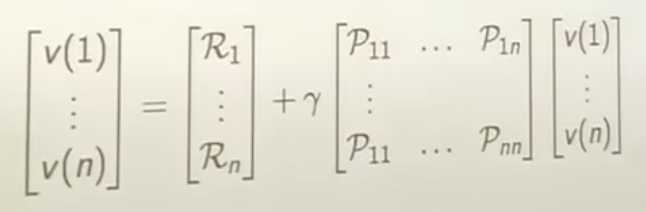

### Solving the Bellman Equation
The bellman equation is a linear equation, so it can be solved directly. The computational complexity for this is O($n^3$) for n states. So it's only really pheasible for small MRPs due to the computational complexity.

There are other methods for solving it for larger MRPs, such as:
- Dynamic programming
- Monte-Carlo evaluation
- Temporal-Difference Learning

# Markov Decision Processes

A Markov Decision Process (MDP) is a Markov reward process with decisions. It's an environment in which all states are Markov.

### Definition
*Markov Decision Process* is a tuple $\langle \mathcal{S}, \mathcal{A}, \mathcal{P}, \mathcal{R}, \gamma \rangle$
- $\mathcal{S}$ is a finite set of states
- $\mathcal{A}$ is a finite set of actions
- $\mathcal{P}$ is a state transition probability matrix,

$\mathcal{P}_{ss'}^a=\mathbb{P}[S_{t+1}=s'|S_t=s, A_t=a]$

- $\mathcal{R}$ is a reward function, $\mathcal{R}^a_s = \mathbb{E}[R_{t+1}|S_t=s, A_t=a]$
- $\gamma$ is a discount factor between 0 and 1 (inclusive)

# Policies
### Definition
A policy $\pi$ is a distribution over actions given states,
$\pi(a|s) = \mathbb{P}[A_t=a|S_t=s]$

- The policy fully defines the behaviour of an agent
- MDP policies depend on the current state and note the history (Markov property)
- i.e. Policies are stationary and so are time-independent

Rewards aren't included in the definition because by definition the current state gives us all the ifnormation we need from the past and so we are only really trying to maximise the reward from then onwards.


- Given an MDP $\mathcal{M}=\langle \mathcal{S}, \mathcal{A}, \mathcal{P}, \mathcal{R}, \gamma \rangle$ and a policy $\pi$
- The state sequence $S_1, S_2, ...$ is a markov process $\angle \mathcal{S}, \mathcal{P}^{\pi}$ (The transition probability matrix given the policy pi)
- The state and reward sequences $S_1, R_2, S_2, ...$ is a Markov reward process $\langle \mathcal{S}, \mathcal{P}^{\pi}, \mathcal{R}^{\pi}, \gamma \rangle$

Where:

$\mathcal{P}^{\pi}_{s,s'} = \sum_{a \in A}\pi(a|s)\mathcal{P}^a_{s,s'}$

$\mathcal{R}^{\pi}_s = \sum_{a \in A} \pi(a|s)\mathcal{R}^a_s$


# Value Function
## State-Value Function
### Definition
The *state-value* function $V_{\pi}(s)$ of an MDP is the expected return starting from state s, and then following policy $\pi$

$v_{pi}(s)=\mathbb{E}_{\pi}[G_t|S_t=s]$

## Action-Value Function
### Definition
The *action-value* function $q_\pi(s, a)$ is the expected return starting from state s, taking action a, and then following policy $\pi$:

$q_{\pi}(s,a)=\mathbb{E}_{\pi}[G_t|S_t=s,A_t=a]$

## Bellman Expectation Equation

The state-value function can again be decomposed into immediate reward plus discounted value of successor state,

$v_{\pi}(s)=\mathbb{E}_{\pi}[R_{t+1}+\gamma v_{pi}(S_{t+1})|S_t=s]$

The action-value function can similarly be decomposed,

$q_{\pi}(s,a) = \mathbb{E}_{\pi}[R_{t+1}+\gamma q_{\pi}(S_{t+1},A_{t+1})|S_t=s,A_t=a]$

## Optimal Value Function
### Definition
The optimal *state-value* function $v_*(s)$ is the maximum value function over all policies:

$v_*(s)=\max_{\pi}v_{\pi}(s)$

The optimal *action-value* function $q_*(s,a)$ is the maximum action-value function over all policies

$q_*(s,a)=\max_{\pi}q_{\pi}(s,a)$

- The optimal value function specifies the best possible performance in the MDP.

- An MDP is solved when we know the optimal action-value function. Because we would just greedily pick the actions that give us the best action value.

## Optimal Policy
Define a partial ordering over policies

$\pi \geq \pi'$ if $v_{\pi}(s) \geq v_{\pi'}(s),\forall S$

Essentially, a policy is greater than another policy if all state values in the new policy is greater than or equal to their corresponding state in the old policy.

### Theorem
For any Marko Decision Process
- There exists an optimal policy $\pi_*$, that is better than or equal to all other policies, $\pi_* \geq \pi, \forall\pi$
- All optimal policies achieves the optimal value function, 
$v_{\pi_*}(s)=v_*(s)$
- All optimal policies achieve the optimal action-value function,
$q_{\pi_*}(s,a)=q_*(s,a)$

## Finding an Optimal Policy
An optimal policy can be found by maximising over $q_*(s,a)$,

$\pi_*(a|s)=$ 1 if $a=\argmax_{a\in A}q_*(s,a)$ otherwise 0

There's always a deterministic optimal policy for any MDP.
If we know $q_*(s,a)$, we know the optimal policy.

# From the Book

## Premise: K-armed Bandit

In this problem we imagine an agent that has k-levers. Each lever samples from a fixed probability distribution to give a reward. We want to find a way to maximise the reward and we do this by finding out which of the levers will give us the highest return. This is the Action-Value. We don't know the action values at first, so mwe must use some methods to find (approximate) them.

## Action-Value Methods

A simple way we could do this is by simply trying out each lever many times, then averaging the reward. Due to the law of large numbers, as the number of times we sample a lever grows to infinity, we should reach the true action value.

We denote the true action value as $q_*(a)$ and our running estimate as $Q_t(a)$

So our equations for finding $Q_t(a)$ at any given timestep would be:

$Q_t(a) = \frac{\text{sum of rewards when a taken prior to t}}{\text{number of times a taken prior to t}}=\frac{\sum_{i=1}^{t-1}R_i \cdot \mathbb{1}_{A_i=a}}{\sum_{i=1}^{t-1}\mathbb{1}_{A_i=a}}$

Where $R_i$ is the actual reward given and $\mathbb{1}$ is a random variable that's 1 if true and 0 if false, it essentially means did we pick this certain lever at timestep t?

Also, if the denomintator is 0, we can give the action value a default value, which could be something as simple as 0. 

Then our simplest action selection rule would simply be to select the action with the highest action value estimate:

$A_t = \argmax_a Q_t(a) $

Here $A_t$ is the action, and we get this be returning the index of the action value with the highest action value. If there's multiple actions with the sam highest value, we can pick randomly. 

This method, constantly exploiting, would maximise our immediate reward at any given time, but it fails to sample other actions to get a good estimate for their true action value. A simple way around this is to introduce $\epsilon$, this is a small probability that we take a random action. So if it were 0.01, then for every 99 exploits, we would explore once. These methods using epsilon are known as $\epsilon$-*greedy* methods.

<Axes: >

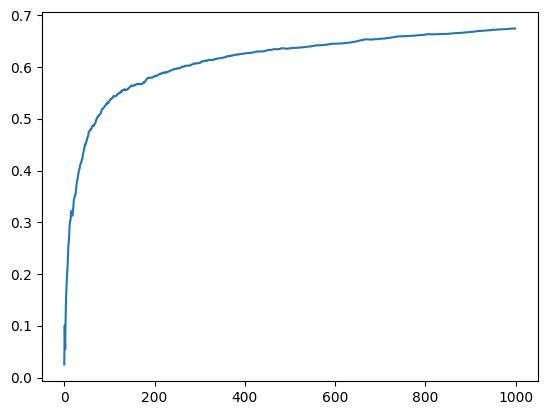

In [ ]:
import numpy as np
import random
import seaborn
random.seed(42)


def k_armed_testbed(k=10, t_max=1000):
    action_means = np.zeros(k, float)
    action_values = np.zeros(k, float)
    action_counts = np.zeros(k)
    action_total_rewards = np.zeros(k, float)
    t_max = 1000
    epsilon = 0.1
    avg_reward_hist = []
    avg_reward = 0

    # Set up distributions
    for i in range(k):
        action_means[i] = (random.uniform(-1, 1))

    for t in range(1, t_max+1):
        if random.random() > epsilon:
            # Greedily pick action from action values
            action = np.argmax(action_values)
        else:
            # Randomly pick action
            action = random.randrange(0, k)

        # Increment action count for action
        action_counts[action] += 1
        # Get reward from normal distribution
        reward = random.normalvariate(action_means[action])
        # Update action values

        # Re-compute action value using total reward (less efficient)
        #action_total_rewards[action] += reward 
        #action_values[action] = action_total_rewards[action] / action_counts[action]

        avg_reward += (1/t) * (reward - avg_reward)

        avg_reward_hist.append(avg_reward)

        # Incremental update rule (more efficient)
        # Can think of this as if the new reward is different to what I expect it to be
        # (via the action value) - then update it correspondingly, taking into account uncertainty
        # At first there's lots of uncertainty, but over time we're more confident, so we update less and less
        action_values[action] += (1/action_counts[action]) * (reward - action_values[action])

    return avg_reward_hist

runs = 100
total_avg_reward_hist = []

for i in range(runs):
    total_avg_reward_hist.append(k_armed_testbed())

total_avg_reward_hist = np.array(total_avg_reward_hist)
total_avg_reward_hist = total_avg_reward_hist.mean(axis=0)

"""
print("T =", t_max)
print("True action values: ", action_means)
print("Estimated action values: ", action_values)
print("Action counts: ", action_counts)
"""
seaborn.lineplot(total_avg_reward_hist)


## Tracking a Nonstationary problem

The previous bandit problem was stationary, in that the reward distribution didn't change with time. Many problems in reinforcement learning are non-stationary, where the reward probabilities do change over time. In these cases, we want to favour recent rewards over rewards in the distance past, due the recent rewards being closer to the true current action value. 

A popular way of doing this is to use a constant step-size parameter. The step-size paramter in the last example was $\frac{1}{n}$, which was helpful in the stationary scenario.

So we modify the incremental update to look like:

$Q_{n+1} = Q_n + \alpha [R_n-Q_n]$

Where $\alpha$ is the step-size parameter $\alpha \in (0,1]$.

The equation above shows the recursive formula, but this can also be shown iteratively:

$(1-\alpha)^nQ_1 + \sum^n_{i=1}\alpha(1-\alpha)^{n-i}R_i$

This shows that timesteps further away to n are weighted less, as the < 1 value is increasingly brought to higher powers, which leads to a smaller value and thus a smaller weight. 

<Axes: >

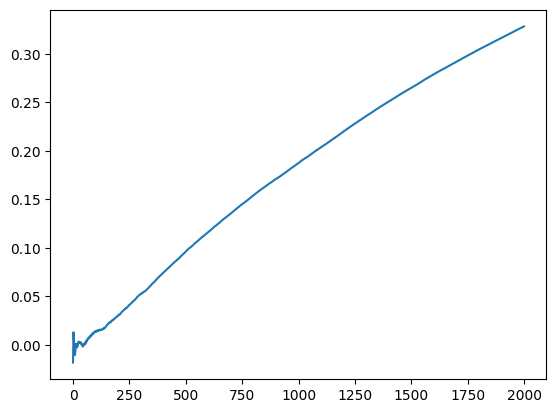

In [82]:
import numpy as np
import random
import seaborn
random.seed(44)

def k_armed_testbed_non_stationary():
    k = 10
    action_means = np.zeros(k, float)
    action_values = np.zeros(k, float)
    action_counts = np.zeros(k)
    action_total_rewards = np.zeros(k, float)
    t_max = 2000
    epsilon = 0.1
    step_size = 0.1
    rewards = [[] for _ in range(k)]
    avg_reward = 0
    avg_reward_hist = []

    for t in range(1, t_max+1):
        if random.random() > epsilon:
            # Greedily pick action from action values
            action = np.argmax(action_values)
        else:
            # Randomly pick action
            action = random.randrange(0, k)

        # Increment action count for action
        action_counts[action] += 1
        # Get reward from normal distribution
        reward = random.normalvariate(action_means[action])

        avg_reward += (1/t) * (reward - avg_reward)

        # Append reward for violin plot
        rewards[action].append(reward)
        avg_reward_hist.append(avg_reward)

        # Update action values
        for i in range(len(action_means)):
            action_means[i] += random.normalvariate(0, 0.01)

        action_values[action] += step_size * (reward - action_values[action])
    
    return avg_reward_hist

"""
print("T =", t_max)
print("True action values: ", action_means)
print("Estimated action values: ", action_values)
print("Action counts: ", action_counts)
"""

runs = 1000
total_avg_reward_hist = []

for i in range(runs):
    total_avg_reward_hist.append(k_armed_testbed_non_stationary())

total_avg_reward_hist = np.array(total_avg_reward_hist)
total_avg_reward_hist = total_avg_reward_hist.mean(axis=0)

seaborn.lineplot(total_avg_reward_hist)




### Optimistic Starting Values

In our previous examples, we've started $Q_1$ to be 0. In this case this makes sense as we thereotically have no idea what the true $q_*(a)$ values are, they could be +10000 or -10000 or literally any number. But since we do actually know these values we can take advantage of them. We do this by using an optimistically high starting $Q(a)$ value, for example +5. Of course as the $q_*(a)$ values are actually much smaller, the q value estimates will never truly reach these numbers. This causes the agent to explore much more in the beginning as each of the estimates will need to lower to reach their true values. This trick isn't a general trick, but it's an example of tricks that can be used to boost performance when we have some domain knowledge.

### Unbiased constant step-size trick

Using a regular step-size leads to a bias for $Q_1$, so our calculations will "remember" $Q_1$, even though it would be very small as $T->\infty$. We can get around this by using a "hack". This hack essnetially makes the calculations forget about $Q_1$ instantly by essentially setting $Q_1 = R_1$. But instead of explicitly doing this, it does it in a more formal and recursive manner. The new step-size looks like:

$\beta_n=\alpha/\overline{o}_n,$

Where $\overline{o}_n=\overline{o}_{n-1}+\alpha (1-\overline{o}_{n-1}) \ \text{and} \ \overline{o}_0=0$

Keep in mind though that this has it's positives and negatives. For one, it makes using optimistic starting values pointless as they're forgotten instantly, but it's good in situations where we don't want to worry about starting values.

